core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.035000 before the record

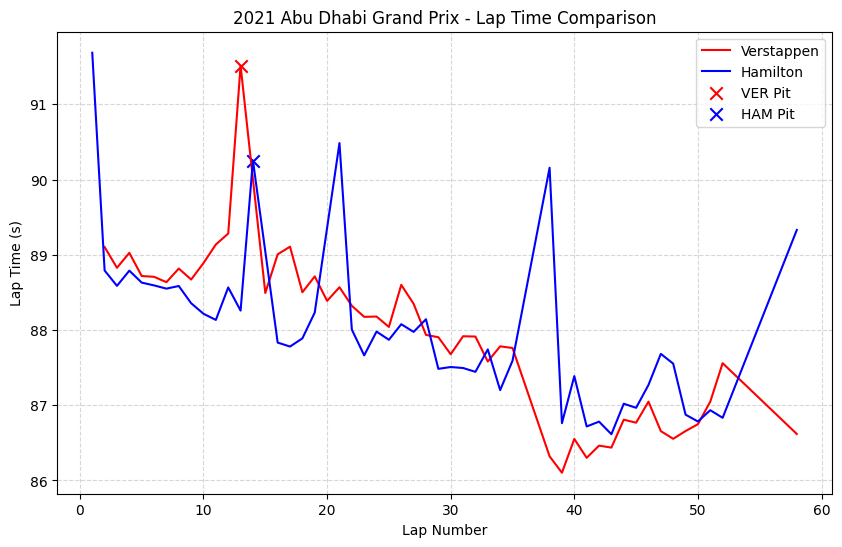

In [7]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt

# キャッシュ有効化
fastf1.Cache.enable_cache('cache')

# セッション読み込み
session = fastf1.get_session(2021, 'Abu Dhabi', 'R')
session.load()

# ラップデータ取得
laps_ver = session.laps.pick_drivers('VER').pick_quicklaps()
laps_ham = session.laps.pick_drivers('HAM').pick_quicklaps()

# ピットインデータ取得
pit_laps_ver = laps_ver[laps_ver['PitOutTime'].notna() | laps_ver['PitInTime'].notna()]
pit_laps_ham = laps_ham[laps_ham['PitOutTime'].notna() | laps_ham['PitInTime'].notna()]

# グラフ化
plt.figure(figsize=(10,6))
plt.plot(laps_ver['LapNumber'], laps_ver['LapTime'].dt.total_seconds(), label='Verstappen', color='red')
plt.plot(laps_ham['LapNumber'], laps_ham['LapTime'].dt.total_seconds(), label='Hamilton', color='blue')
plt.scatter(pit_laps_ver['LapNumber'], pit_laps_ver['LapTime'].dt.total_seconds(), color='red', marker='x', s=80, edgecolors='black', label='VER Pit')
plt.scatter(pit_laps_ham['LapNumber'], pit_laps_ham['LapTime'].dt.total_seconds(), color='blue', marker='x', s=80, edgecolors='black', label='HAM Pit')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title('2021 Abu Dhabi Grand Prix - Lap Time Comparison')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()